<a href="https://colab.research.google.com/github/RHMalalatiana/Recombination_code/blob/main/Value_SandZ_rec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from data_gen_dist_rec import *
import math as mt
import random

In [3]:
list_S=[]
list_Z=[]

n_simulation=10000
#the time divergent of the 3 species is given here
t_12=2.0
t_13=3.0
t_23=3.0
for i in range(n_simulation):
    #we define the initial genome as a sequence of a of length 500
    initial_gen='a'*500
    #here is the input tree of the form [genTime, leftBranch, RightBranch] in this case we have tree of 3 leaves
    gen_time=[1.0,[1.0,[1.0],[1.0]],[1.0]]
    #we start generating the genome sequences of the tree
    tree=generateDriver(initial_gen,gen_time)
    #here we extract the sequences generated
    seq=extract_genomes(tree)
    seq1=seq[0]
    seq3=seq[2]
    seq2=seq[1]
    #let us see the distance between them. Here d_12 should be short and d_13, d_23 should be long
    d_12=hamming_distance(seq1,seq2)
    d_13=hamming_distance(seq1,seq3)
    d_23=hamming_distance(seq2,seq3)
    #the recombinant sequence is a recombination of the first and the third sequences
    breakpoint = 250 #random.randint(1, len(seq1) - 1)
    seq_rec=rec(seq1,seq3,breakpoint)
    #here we compute the distance between the recombinant sequence and its parents
    d_1rec=hamming_distance(seq1,seq_rec)
    d_3rec=hamming_distance(seq3,seq_rec)
    #compute lambda
    lambda_hat=(d_1rec+d_13+d_3rec)/(2*(t_12+t_13+t_23))
    #compute t
    t_13_hat=d_13/(2*lambda_hat)
    t_3rec_hat=d_3rec/(2*lambda_hat)
    #compute S
    S=2*lambda_hat*abs(t_13_hat-t_3rec_hat)
    list_S.append(S)
    #compute Z
    Z=(2*lambda_hat*abs(t_13_hat-t_3rec_hat))/mt.sqrt(2*lambda_hat*(t_13_hat+t_3rec_hat))
    list_Z.append(Z)

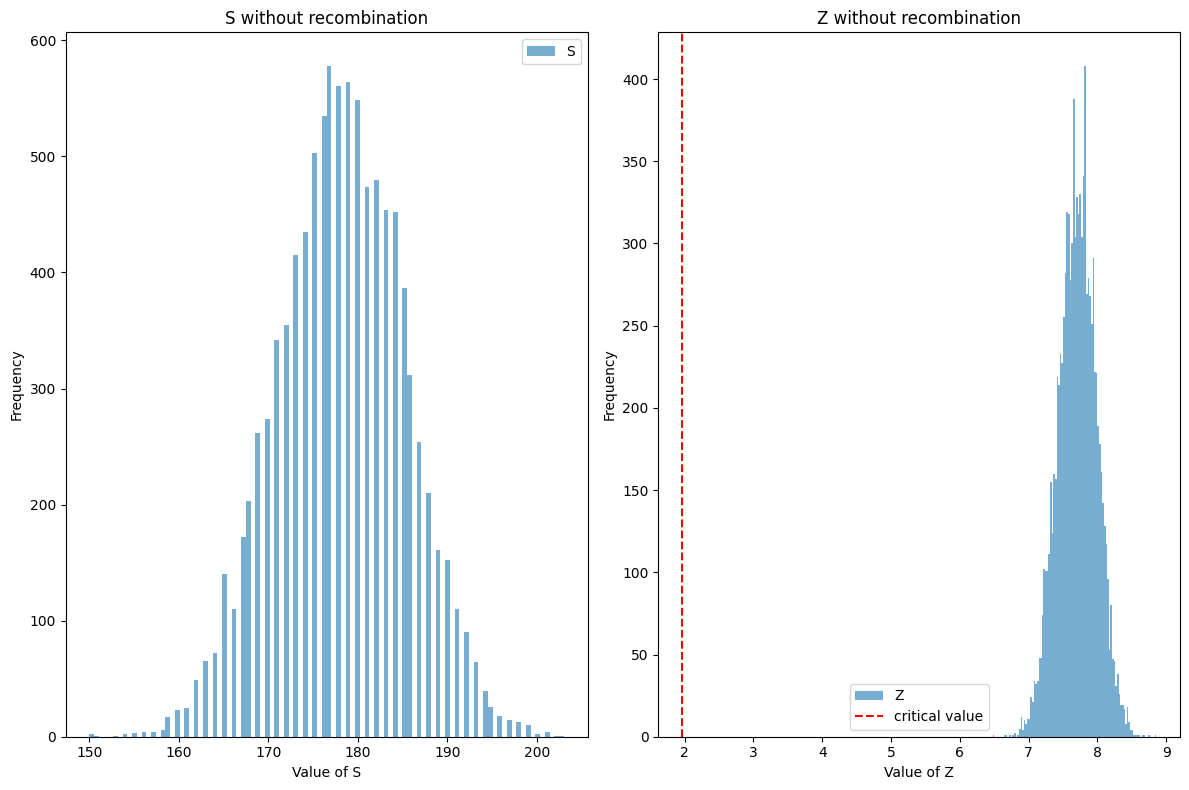

In [4]:
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.hist(list_S, bins=100, alpha=0.6, label="S")
plt.xlabel("Value of S")
plt.ylabel("Frequency")
plt.legend()
plt.title("S without recombination")

plt.subplot(1, 2, 2)
plt.hist(list_Z, bins=100, alpha=0.6, label="Z")
plt.axvline(x=1.96, color='r', linestyle='--',label='critical value')
plt.xlabel("Value of Z")
plt.ylabel("Frequency")
plt.legend()
plt.title("Z without recombination")

plt.tight_layout()
plt.show()